In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_path = "Resources/dated_df.csv"

In [4]:
file_df = pd.read_csv(file_path)
file_df.head()

,timestamp,open,high,low,close,volume,Ticker,Sector
0,2014-12-31,85.88,91.94,81.66,89.310,62647413,ACN,Information Technology
1,2014-12-31,73.41,75.66,70.78,72.200,150299734,MDT,Health Care
2,2014-12-31,148.61,152.94,144.75,150.150,93432673,BRK.B,Financials
3,2014-12-31,46.46,49.68,44.91,47.710,38554847,O,Real Estate
4,2014-12-31,27.50,28.59,26.15,27.815,577451832,CSCO,Information Technology


In [38]:
sorted_df = file_df.sort_values(by=['timestamp'])
sorted_df.head()

,timestamp,open,high,low,close,volume,Ticker,Sector
11173,2000-07-31,85.44,91.94,78.12,81.81,21970800,UNH,Health Care
13820,2000-07-31,101.30,101.40,90.25,93.06,67023900,JNJ,Health Care
959,2000-08-31,20.50,23.69,20.00,23.13,17514100,TMO,Health Care
18859,2000-08-31,75.25,111.60,74.88,108.00,13343200,GILD,Health Care
5857,2000-08-31,99.00,129.50,97.00,129.50,53400600,GS,Financials


In [51]:
#start_drop_dates = sorted_df
cleaned_df = sorted_df.loc[(sorted_df['timestamp']>'2014-12-31')]
predict_df = cleaned_df.loc[(cleaned_df['timestamp']<'2020-01-01')]
predict_df

,timestamp,open,high,low,close,volume,Ticker,Sector
3606,2015-01-30,93.17,93.94,80.5600,80.69,122716305,AXP,Financials
66,2015-01-30,39.05,39.15,33.7300,33.81,265941208,MS,Financials
7060,2015-01-30,89.78,92.63,85.0600,89.44,34141018,SPGI,Financials
20914,2015-01-30,86.01,86.52,81.2500,82.38,66834163,DHR,Health Care
12974,2015-01-30,45.02,45.33,41.8200,41.89,314337721,ORCL,Information Technology
...,...,...,...,...,...,...,...,...
15028,2019-12-31,220.60,228.23,216.3952,226.50,79367551,BRK.B,Financials
9981,2019-12-31,136.65,138.25,134.3200,136.67,82804561,PEP,Consumer Staples
5625,2019-12-31,220.97,232.21,210.0000,229.93,46388859,GS,Financials
14308,2019-12-31,216.46,241.81,200.3700,235.30,164328924,NVDA,Information Technology


In [54]:
#Group by Sector and Timestamp
#Calculate the average sector closing price
sector_time_group = predict_df.groupby(['Sector','timestamp'])
group_avg = sector_time_group['close'].mean()
group_avg

Sector            timestamp 
Consumer Staples  2015-01-30     79.962632
                  2015-02-27     84.253421
                  2015-03-31     83.364211
                  2015-04-30     82.106842
                  2015-05-29     82.664737
                                   ...    
Real Estate       2019-08-30    159.428500
                  2019-09-30    159.634500
                  2019-10-31    158.949500
                  2019-11-29    155.759000
                  2019-12-31    156.467500
Name: close, Length: 300, dtype: float64

In [55]:
#Consumer Staples closing average prices
constaple_df = predict_df.loc[(predict_df["Sector"] == 'Consumer Staples')]
time_constaple_df = constaple_df.groupby('timestamp')
constaple_avg = time_constaple_df['close'].mean()
constaple_avg

timestamp
2015-01-30     79.962632
2015-02-27     84.253421
2015-03-31     83.364211
2015-04-30     82.106842
2015-05-29     82.664737
2015-06-30     81.477368
2015-07-31     84.887368
2015-08-31     79.931000
2015-09-30     80.109000
2015-10-30     84.844000
2015-11-30     85.571500
2015-12-31     86.697250
2016-01-29     86.206000
2016-02-29     85.434000
2016-03-31     88.887000
2016-04-29     88.031500
2016-05-31     88.970500
2016-06-30     93.937500
2016-07-29     93.259000
2016-08-31     89.804500
2016-09-30     87.864000
2016-10-31     86.255000
2016-11-30     78.255500
2016-12-30     80.160500
2017-01-31     81.012000
2017-02-28     85.834500
2017-03-31     85.223000
2017-04-28     86.446500
2017-05-31     89.340500
2017-06-30     86.784000
2017-07-31     87.087000
2017-08-31     87.440500
2017-09-29     86.238000
2017-10-31     86.420500
2017-11-30     91.906500
2017-12-29     94.644000
2018-01-31     95.396500
2018-02-28     89.604500
2018-03-29     88.680000
2018-04-30     

Text(0, 0.5, 'Average Closing Price ($)')

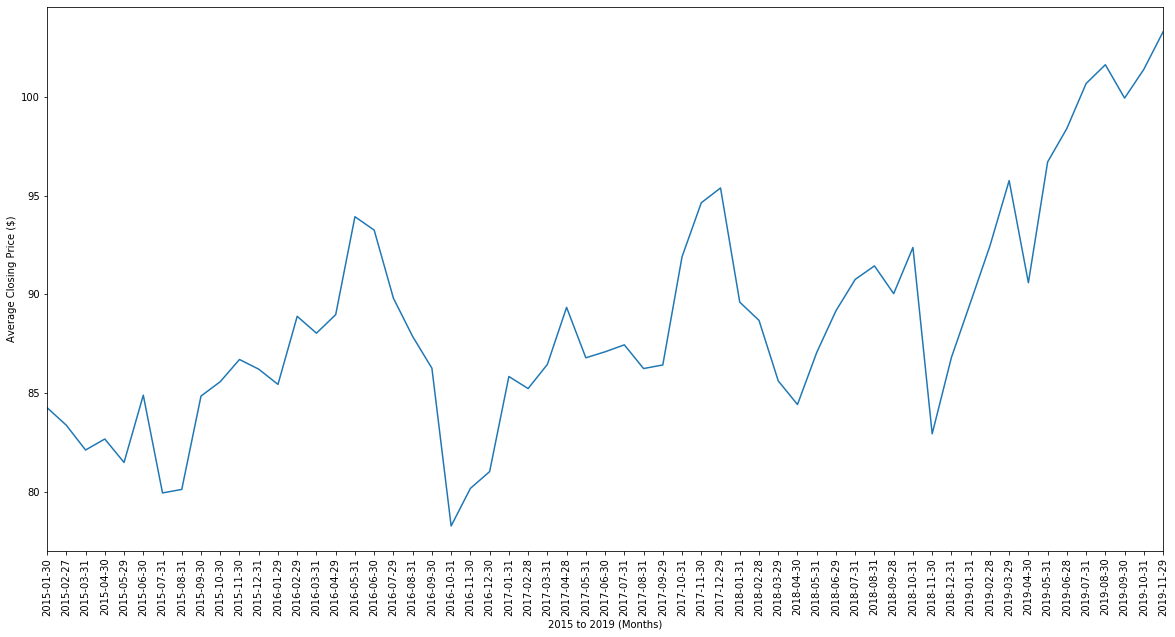

In [101]:
plt.figure(figsize = (20,10))
plt.plot(constaple_avg)
hi = constaple_avg.reset_index()
hi
constaple_labels = hi['timestamp']
constaple_labels
xtick_locations = np.arange(1,len(constaple_labels),1)
plt.xticks(xtick_locations,labels = constaple_labels,rotation = 90)
plt.xlim(1,59)
plt.xlabel('2015 to 2019 (Months)')
plt.ylabel('Average Closing Price ($)')